In [1]:
!pip install sidrapy

In [2]:
import pandas as pd
import sidrapy as sidra
import numpy as np
import matplotlib.pyplot as plt


# 1. Contas Nacionais Trimestrais

## Série encadeada do índice de volume trimestral com ajuste sazonal

In [3]:
pib_sa_raw = sidra.get_table(table_code="1621", territorial_level= "1", ibge_territorial_code="all", variable="584", classifications = { "11255": "90687,90691,90696,90707,93404,93405,93406,93407,93408"}, period= "all")

In [4]:
pib_sa_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
1,1,Brasil,30,Número-índice,95.26,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90687,Agropecuária - total
2,1,Brasil,30,Número-índice,99.87,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90691,Indústria - total
3,1,Brasil,30,Número-índice,102.00,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90696,Serviços - total
4,1,Brasil,30,Número-índice,99.40,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90707,PIB a preços de mercado


In [5]:
colunas = list(pib_sa_raw.iloc[0].values)

In [6]:
pib_sa_raw.columns = colunas
pib_sa_raw.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
1,1,Brasil,30,Número-índice,95.26,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90687,Agropecuária - total
2,1,Brasil,30,Número-índice,99.87,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90691,Indústria - total
3,1,Brasil,30,Número-índice,102.00,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90696,Serviços - total
4,1,Brasil,30,Número-índice,99.40,1,Brasil,199601,1º trimestre 1996,584,Série encadeada do índice de volume trimestral...,90707,PIB a preços de mercado


In [7]:
df_temp = pib_sa_raw.iloc[1:].copy()

In [8]:
df_pib_sa = df_temp[['Trimestre (Código)', 'Setores e subsetores', 'Valor']].copy()
df_pib_sa.head()

,Trimestre (Código),Setores e subsetores,Valor
1,199601,Agropecuária - total,95.26
2,199601,Indústria - total,99.87
3,199601,Serviços - total,102.00
4,199601,PIB a preços de mercado,99.40
5,199601,Despesa de consumo das famílias,98.87


In [9]:
df_pib_sa['Setores e subsetores'].value_counts()

,count
Setores e subsetores,
Agropecuária - total,118
Indústria - total,118
Serviços - total,118
PIB a preços de mercado,118
Despesa de consumo das famílias,118
Despesa de consumo da administração pública,118
Formação bruta de capital fixo,118
Exportação de bens e serviços,118
Importação de bens e serviços (-),118


In [10]:
df_pib_sa.rename(columns= {"Trimestre (Código)": "date", "Setores e subsetores": "variavel"},inplace= True)

In [11]:
df_pib_sa.replace(to_replace= { "variavel": {
                "Agropecuária - total": "Agropecuária",
                "Indústria - total": "Indústria",
                "Serviços - total": "Serviços",
                "PIB a preços de mercado": "PIB",
                "Despesa de consumo das famílias": "Consumo das Famílias",
                "Despesa de consumo da administração pública": "Despesa do Governo",
                "Formação bruta de capital fixo": "FBFC",
                "Exportação de bens e serviços": "Exportação",
                "Importação de bens e serviços (-)": "Importação"
                }}, inplace= True)

In [12]:
df_pib_sa['variavel'].value_counts()

,count
variavel,
Agropecuária,118
Indústria,118
Serviços,118
PIB,118
Consumo das Famílias,118
Despesa do Governo,118
FBFC,118
Exportação,118
Importação,118


In [13]:

df_pib_sa['date']= pd.to_datetime(df_pib_sa['date'].str.slice_replace(start= 4, stop=5, repl ='-Q'))

df_pib_sa.head()

/tmp/ipython-input-3558728768.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pib_sa['date']= pd.to_datetime(df_pib_sa['date'].str.slice_replace(start= 4, stop=5, repl ='-Q'))


,date,variavel,Valor
1,1996-01-01,Agropecuária,95.26
2,1996-01-01,Indústria,99.87
3,1996-01-01,Serviços,102.00
4,1996-01-01,PIB,99.40
5,1996-01-01,Consumo das Famílias,98.87


In [14]:
df_pib_sa['Valor'] = df_pib_sa['Valor'].astype(float)

In [15]:
df_pib_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 1 to 1062
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1062 non-null   datetime64[ns]
 1   variavel  1062 non-null   object        
 2   Valor     1062 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.0+ KB


In [16]:
df_pib_sa_indice = (
    df_pib_sa
    .pivot(index="date", columns="variavel", values="Valor")
    .sort_index()
)

In [17]:
df_pib_sa_indice.head()

variavel,Agropecuária,Consumo das Famílias,Despesa do Governo,Exportação,FBFC,Importação,Indústria,PIB,Serviços
date,,,,,,,,,
1996-01-01,95.26,98.87,99.17,99.62,96.84,91.55,99.87,99.40,102.00
1996-04-01,96.59,100.91,100.77,96.23,98.72,99.91,97.66,100.68,102.26
1996-07-01,101.76,103.64,104.27,95.81,102.41,107.27,106.26,104.15,103.56
1996-10-01,125.78,109.21,88.50,100.41,106.77,118.98,100.09,103.39,101.41
1997-01-01,101.88,106.66,100.34,105.26,107.68,118.69,103.69,104.43,103.91


In [18]:
df_pib_sa_var_marginal = df_pib_sa_indice.pct_change() * 100

In [19]:
df_pib_sa_var_marginal.dropna(inplace= True)

In [20]:
df_pib_sa_var_marginal.head()

variavel,Agropecuária,Consumo das Famílias,Despesa do Governo,Exportação,FBFC,Importação,Indústria,PIB,Serviços
date,,,,,,,,,
1996-04-01,1.396179,2.063315,1.613391,-3.402931,1.941347,9.131622,-2.212877,1.287726,0.254902
1996-07-01,5.352521,2.705381,3.473256,-0.436454,3.737844,7.366630,8.806062,3.446563,1.271269
1996-10-01,23.604560,5.374373,-15.124197,4.801169,4.257397,10.916379,-5.806512,-0.729717,-2.076091
1997-01-01,-19.001431,-2.334951,13.378531,4.830196,0.852299,-0.243738,3.596763,1.005900,2.465240
1997-04-01,-1.472320,0.271892,-0.408611,5.975679,1.411590,4.136827,0.993346,0.536244,0.548552


### Visualização: Variação do PIB e seu componentes na margem

#### PIB com ajuste sazonal

In [21]:
df_pib_sa_var_marginal.tail().sort_index(ascending=False)

variavel,Agropecuária,Consumo das Famílias,Despesa do Governo,Exportação,FBFC,Importação,Indústria,PIB,Serviços
date,,,,,,,,,
2025-04-01,-0.145278,0.461165,-0.576387,0.707236,-2.183852,-2.855632,0.498788,0.371882,0.628340
2025-01-01,12.311099,0.975442,0.006198,3.087679,3.168701,5.455321,0.000000,1.308147,0.352515
2024-10-01,-3.367370,-0.999660,0.435757,-1.371076,0.423540,0.256528,0.166539,0.062831,0.174077
2024-07-01,1.154401,1.337595,0.588604,-0.448742,2.595769,1.306057,0.896170,0.791599,0.761752
2024-04-01,-0.768709,1.219512,0.043851,1.348132,2.610736,8.498717,0.776124,1.521564,0.798141


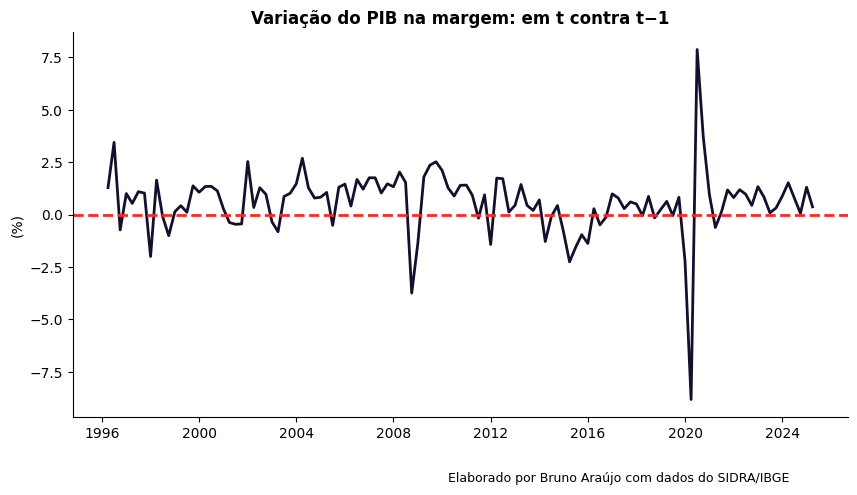

In [22]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['PIB'], color='#140F2D', linewidth=2)

ax.set_title("Variação do PIB na margem: em t contra t−1", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Agropecuária com ajuste sazonal

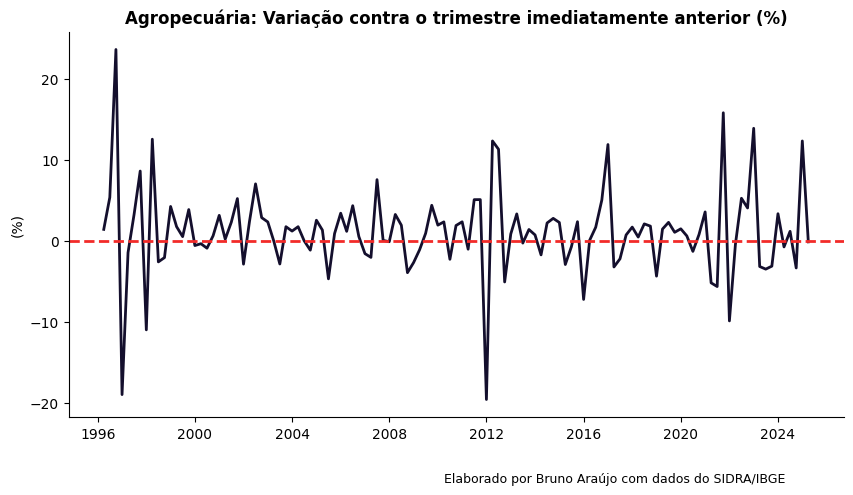

In [23]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Agropecuária'], color='#140F2D', linewidth=2)

ax.set_title("Agropecuária: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Consumo das Famílias com ajuste sazonal

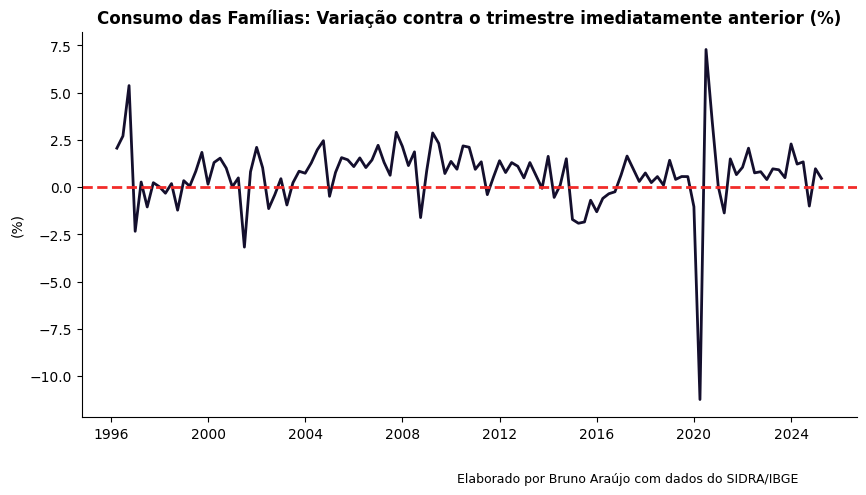

In [24]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Consumo das Famílias'], color='#140F2D', linewidth=2)

ax.set_title("Consumo das Famílias: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#### Despesa do Governo com ajuste sazonal

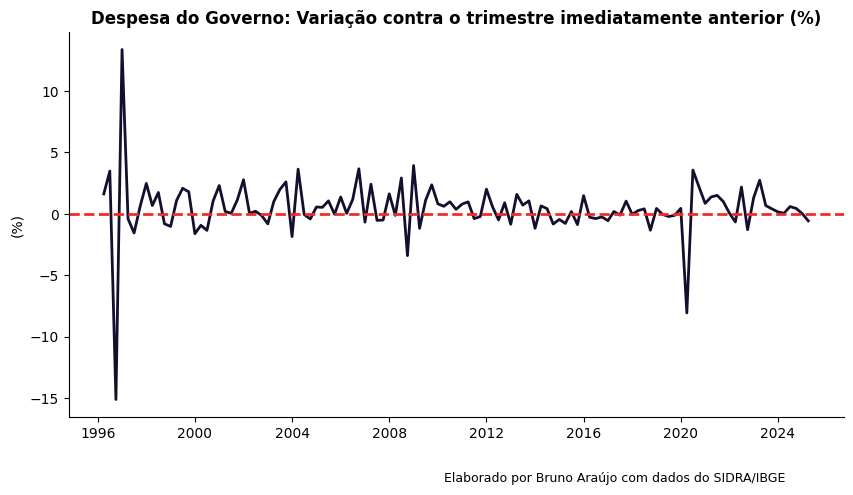

In [25]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Despesa do Governo'], color='#140F2D', linewidth=2)

ax.set_title("Despesa do Governo: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#### Exportação com ajuste sazonal

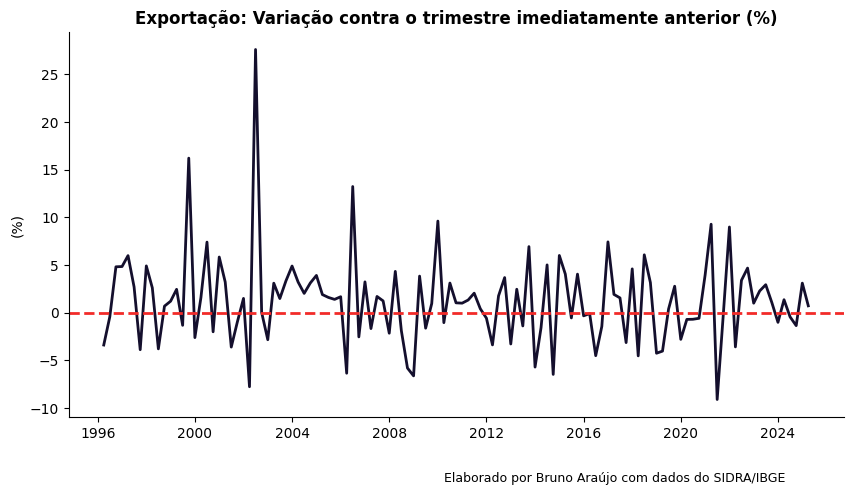

In [26]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Exportação'], color='#140F2D', linewidth=2)

ax.set_title("Exportação: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Importação com ajuste sazonal

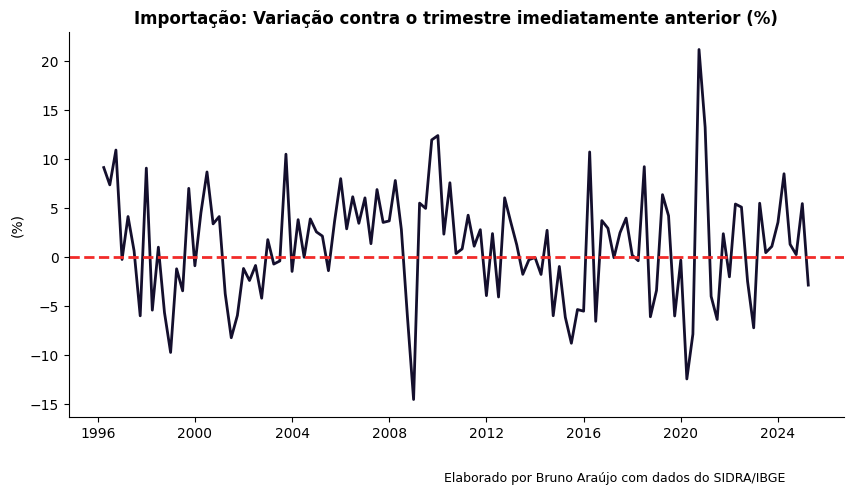

In [27]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Importação'], color='#140F2D', linewidth=2)

ax.set_title("Importação: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Formação Bruta de Capital Fixo com ajuste sazonal

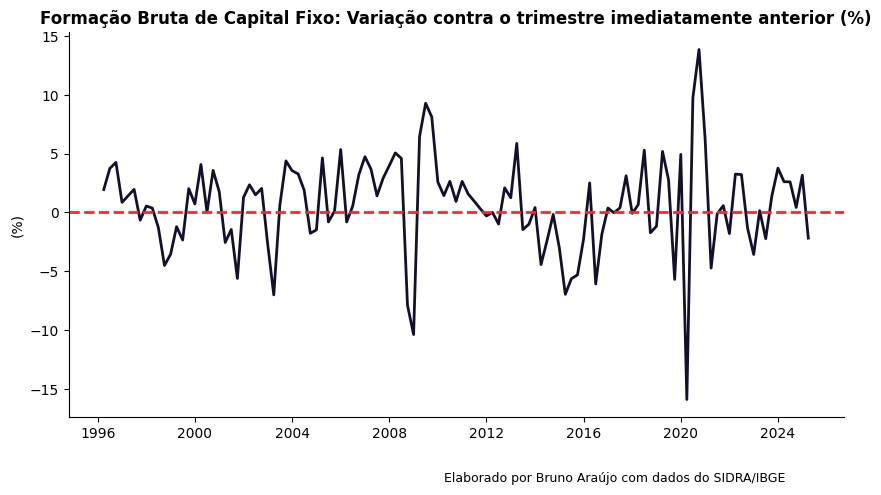

In [28]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['FBFC'], color='#140F2D', linewidth=2)

ax.set_title("Formação Bruta de Capital Fixo: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#### Serviços com ajuste sazonal

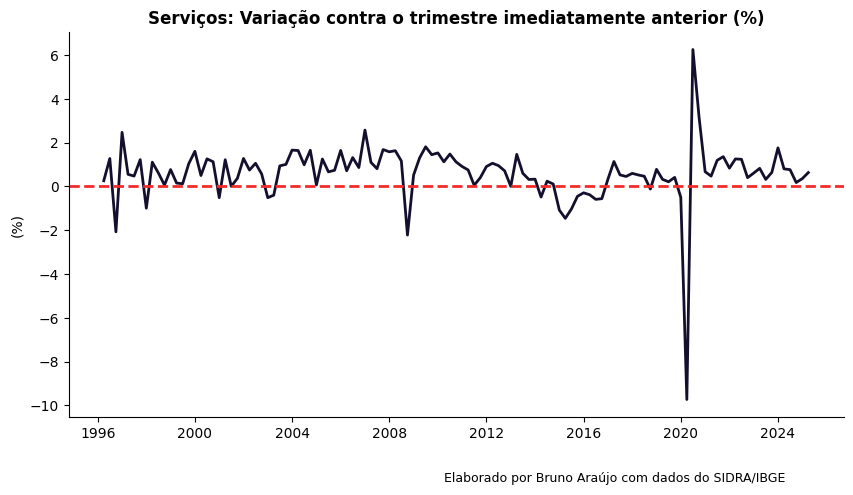

In [29]:
fig, ax  = plt.subplots(figsize = (10,5))

ax.plot(df_pib_sa_var_marginal['Serviços'], color='#140F2D', linewidth=2)

ax.set_title("Serviços: Variação contra o trimestre imediatamente anterior (%)", fontweight ='bold', fontsize =12)

fig.text(0.5, -0.02, "Elaborado por Bruno Araújo com dados do SIDRA/IBGE", fontsize =9 )

ax.set_ylabel("(%)")

ax.axhline(y=0.0, linewidth =2, color='#F22B29', linestyle ='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Série encadeada do índice de volume trimestral sem ajuste sazonal

In [30]:
pib_raw = sidra.get_table(table_code="1620", territorial_level= "1", ibge_territorial_code="all", variable="583", classifications = { "11255": "90687,90691,90696,90707,93404,93405,93406,93407,93408"}, period= "all")

In [31]:
pib_raw.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
1,1,Brasil,30,Número-índice,105.32,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90687,Agropecuária - total
2,1,Brasil,30,Número-índice,93.19,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90691,Indústria - total
3,1,Brasil,30,Número-índice,98.31,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90696,Serviços - total
4,1,Brasil,30,Número-índice,96.84,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90707,PIB a preços de mercado


In [32]:
colunas = list(pib_sa_raw.iloc[0].values)

In [33]:
pib_raw.columns = colunas
pib_raw.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Trimestre (Código),Trimestre,Variável (Código),Variável,Setores e subsetores (Código),Setores e subsetores
1,1,Brasil,30,Número-índice,105.32,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90687,Agropecuária - total
2,1,Brasil,30,Número-índice,93.19,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90691,Indústria - total
3,1,Brasil,30,Número-índice,98.31,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90696,Serviços - total
4,1,Brasil,30,Número-índice,96.84,1,Brasil,199601,1º trimestre 1996,583,Série encadeada do índice de volume trimestral...,90707,PIB a preços de mercado


In [34]:
df_temp = pib_raw.iloc[1:].copy()
df_pib = df_temp[['Trimestre (Código)', 'Setores e subsetores', 'Valor']].copy()
df_pib.head()

df_pib.rename(columns= {"Trimestre (Código)": "date", "Setores e subsetores": "variavel"},inplace= True)

df_pib.replace(to_replace= { "variavel": {
                "Agropecuária - total": "Agropecuária",
                "Indústria - total": "Indústria",
                "Serviços - total": "Serviços",
                "PIB a preços de mercado": "PIB",
                "Despesa de consumo das famílias": "Consumo das Famílias",
                "Despesa de consumo da administração pública": "Despesa do Governo",
                "Formação bruta de capital fixo": "FBFC",
                "Exportação de bens e serviços": "Exportação",
                "Importação de bens e serviços (-)": "Importação"
                }}, inplace= True)

In [35]:
df_pib['date']= pd.to_datetime(df_pib['date'].str.slice_replace(start= 4, stop=5, repl ='-Q'))

df_pib['Valor'] = df_pib['Valor'].astype(float)

df_pib_indice = (
    df_pib
    .pivot(index="date", columns="variavel", values="Valor")
    .sort_index()
)

/tmp/ipython-input-1528064231.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pib['date']= pd.to_datetime(df_pib['date'].str.slice_replace(start= 4, stop=5, repl ='-Q'))


In [36]:
df_pib_indice.head()

variavel,Agropecuária,Consumo das Famílias,Despesa do Governo,Exportação,FBFC,Importação,Indústria,PIB,Serviços
date,,,,,,,,,
1996-01-01,105.32,96.06,96.12,95.16,92.91,82.07,93.19,96.84,98.31
1996-04-01,105.50,99.75,100.07,104.64,101.18,98.20,97.90,100.12,100.58
1996-07-01,108.10,104.74,105.00,106.67,105.26,114.44,111.62,107.56,105.75
1996-10-01,92.89,112.39,91.51,91.85,105.43,127.67,101.19,104.31,104.55
1997-01-01,112.67,103.65,97.30,94.70,103.37,104.68,96.25,100.13,100.20


In [37]:
df_pib_var_interanual = df_pib_indice.pct_change(4) * 100

In [38]:
df_pib_var_interanual.dropna(inplace=True)

In [39]:
df_pib_var_interanual.head()

variavel,Agropecuária,Consumo das Famílias,Despesa do Governo,Exportação,FBFC,Importação,Indústria,PIB,Serviços
date,,,,,,,,,
1997-01-01,6.978731,7.901312,1.227632,-0.483396,11.258207,27.549653,3.283614,3.397356,1.922490
1997-04-01,4.417062,5.994987,-0.789447,14.334862,10.703696,23.828921,8.038815,4.754295,2.256910
1997-07-01,1.470860,2.062249,-5.714286,17.502578,8.512255,15.886054,0.206056,1.794347,1.276596
1997-10-01,-11.034557,-2.838331,11.485084,11.638541,3.632742,-1.989504,6.433442,3.738855,4.667623
1998-01-01,-1.420076,-0.501688,1.223022,10.422386,3.492309,7.852503,0.062338,1.008689,1.397206


In [40]:
temp = df_pib_indice.copy()

In [41]:
temp = temp.reset_index()
temp['ano'] =temp['date'].dt.year





In [42]:
temp['trimestre'] = temp['date'].dt.quarter

In [43]:
variaveis = [
    "Agropecuária", "Consumo das Famílias", "Despesa do Governo",
    "Exportação", "FBFC", "Importação",
    "Indústria", "PIB", "Serviços"
]

In [44]:
df_pib_acum = temp[['date', 'ano', 'trimestre']].copy()

In [45]:
df_pib_acum.head()

variavel,date,ano,trimestre
0,1996-01-01,1996,1
1,1996-04-01,1996,2
2,1996-07-01,1996,3
3,1996-10-01,1996,4
4,1997-01-01,1997,1


In [46]:

for var in variaveis:
    df_pib_acum[f'{var}_acum'] = temp.groupby('ano')[var].cumsum()
    df_pib_acum[f'{var}_var_anual'] = (
        (df_pib_acum[f'{var}_acum'] /
         df_pib_acum.groupby('trimestre')[f'{var}_acum'].shift(1) - 1) * 100
    )


df_pib_var_anual = df_pib_acum[['date'] + [c for c in df_pib_acum.columns if c.endswith('_var_anual')]].copy()
df_pib_var_anual = df_pib_var_anual.set_index("date")

In [47]:
df_pib_var_anual.head()

variavel,Agropecuária_var_anual,Consumo das Famílias_var_anual,Despesa do Governo_var_anual,Exportação_var_anual,FBFC_var_anual,Importação_var_anual,Indústria_var_anual,PIB_var_anual,Serviços_var_anual
date,,,,,,,,,
1996-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,6.978731,7.901312,1.227632,-0.483396,11.258207,27.549653,3.283614,3.397356,1.92249


In [48]:
df_pib_var_anual[df_pib_var_anual.index == '2023-07-01']

variavel,Agropecuária_var_anual,Consumo das Famílias_var_anual,Despesa do Governo_var_anual,Exportação_var_anual,FBFC_var_anual,Importação_var_anual,Indústria_var_anual,PIB_var_anual,Serviços_var_anual
date,,,,,,,,,
2023-07-01,19.442377,3.45542,3.312639,9.480974,-2.482326,-1.272851,1.223631,3.529257,2.960131
